In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot 
import seaborn as sns 

In [15]:
pd.set_option("display.max_columns", None)

In [16]:
df = pd.read_csv("gurgaon_properties_outlier_treated.csv")

In [17]:
df.duplicated().sum()


0

In [7]:
df.sample(5)

,Unnamed: 0,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
257,267,flat,suncity heights,sector 54,3.25,14118.0,2302.0,Carpet area: 2302 (213.86 sq.m.),3.0,3.0,3+,0.0,East,Old Property,NaN,NaN,2302.0,0,0,0,1,0,1,120,767.333333
147,152,house,bestech park view aindependentda,sector 81,4.35,7937.0,5481.0,Plot area 5480(509.11 sq.m.),4.0,4.0,3,2.0,North,Relatively New,NaN,5480.0,NaN,1,0,1,0,0,0,51,1370.250000
1297,1345,flat,bestech park view sanskruti,sector 92,1.55,9688.0,1600.0,Super Built up area 1995(185.34 sq.m.)Carpet a...,3.0,3.0,3,17.0,NaN,Relatively New,1995.0,NaN,1600.0,0,0,1,0,0,1,60,533.333333
2718,2872,flat,ramprastha the edge towers,sector 37d,0.71,5420.0,1310.0,Super Built up area 1310(121.7 sq.m.)Built Up ...,2.0,2.0,3,10.0,South-East,New Property,1310.0,1100.0,1000.0,0,0,0,0,1,0,38,655.000000
2455,2582,flat,dlf new town heights,sector 90,1.90,6967.0,2727.0,Super Built up area 2727(253.35 sq.m.)Carpet a...,4.0,4.0,3+,19.0,North-East,Relatively New,2727.0,NaN,2300.0,1,0,1,0,0,1,174,681.750000


In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
Price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1003
agePossession             0
super_built_up_area    1667
built_up_area          1966
carpet_area            1703
store room                0
study room                0
servant room              0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area/room                 0
dtype: int64

In [ ]:
#Built-up-area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

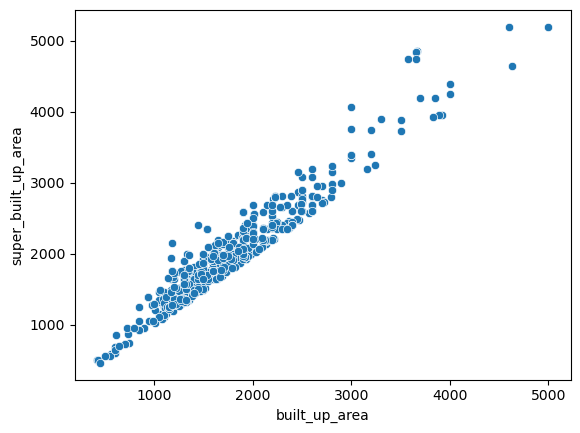

In [23]:
sns.scatterplot(x = df["built_up_area"], y =df["super_built_up_area"])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

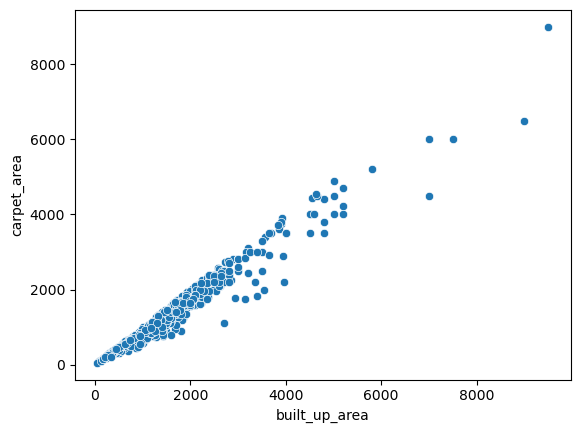

In [25]:
sns.scatterplot(x = df["built_up_area"], y =df["carpet_area"])

In [54]:
all_val_present = df[~((df["super_built_up_area"].isnull())| (df["carpet_area"].isnull()) | (df["built_up_area"].isnull()))]

In [56]:
all_val_present.shape

(531, 24)

In [57]:
super_built_up_ratio = (all_val_present["super_built_up_area"]/all_val_present["built_up_area"]).median ()

In [58]:
carpet_bulit_up_ratio =(all_val_present["carpet_area"]/all_val_present["built_up_area"]).median()

In [59]:
super_built_up_ratio , carpet_bulit_up_ratio 

(1.105263157894737, 0.9)

In [ ]:
# rows where super_built_area and carpet are present 

In [61]:
 sbc_df =df[~(df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & ~(df["carpet_area"].isnull())]

In [63]:
sbc_df.sample()

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
2793,flat,mapsko mount ville,sector 79,1.2,8054.0,1490.0,Super Built up area 1490(138.43 sq.m.)Carpet a...,3.0,3.0,3+,24.0,East,Relatively New,1490.0,NaN,863.91,0,0,0,0,0,1,135,496.666667


In [64]:
sbc_df["built_up_area"].fillna(round(((sbc_df["super_built_up_area"]/1.105) + (sbc_df["carpet_area"]/0.9))/2), inplace = True)
    

C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\279422265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df["built_up_area"].fillna(round(((sbc_df["super_built_up_area"]/1.105) + (sbc_df["carpet_area"]/0.9))/2), inplace = True)
C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\279422265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [65]:
sbc_df.sample()

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
1005,flat,mapsko mount ville,sector 79,1.3,8025.0,1620.0,Super Built up area 1620(150.5 sq.m.)Carpet ar...,3.0,3.0,2,6.0,West,Relatively New,1620.0,1215.0,867.24,0,1,0,1,0,0,151,540.0


In [66]:
df.update(sbc_df)

In [67]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
Price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1003
agePossession             0
super_built_up_area    1667
built_up_area          1545
carpet_area            1703
store room                0
study room                0
servant room              0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area/room                 0
dtype: int64

In [68]:
# filtering rows wiht only super_built_up is present rest are 0 
sb_df = df[~(df["super_built_up_area"].isnull()) & (df["carpet_area"].isnull()) & (df["built_up_area"].isnull()) ]

In [69]:
sb_df.sample(3)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
1642,flat,sushant lok 1 builder floors,sector 43,2.50,12920.0,1935.0,Super Built up area 215(179.77 sq.m.),3.0,3.0,2,2.0,NaN,New Property,215.0,NaN,NaN,0,0,0,0,0,0,0,645.000000
1604,flat,sbtl caladium,sector 109,1.30,6915.0,1880.0,Super Built up area 1880(174.66 sq.m.),3.0,2.0,3,16.0,East,Moderately Old,1880.0,NaN,NaN,0,0,0,0,0,0,134,626.666667
2373,flat,ireo uptown,sector 66,1.32,11438.0,1154.0,Super Built up area 1158(107.58 sq.m.),2.0,2.0,2,6.0,NaN,Relatively New,1158.0,NaN,NaN,0,0,0,0,0,0,45,577.000000


In [70]:
sb_df["built_up_area"].fillna(round(df["super_built_up_area"]/1.105), inplace = True)

C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\1350438175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df["built_up_area"].fillna(round(df["super_built_up_area"]/1.105), inplace = True)
C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\1350438175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df["built_up_area"].fillna(rou

In [71]:
df.update(sb_df)

In [72]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
Price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1003
agePossession             0
super_built_up_area    1667
built_up_area           671
carpet_area            1703
store room                0
study room                0
servant room              0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area/room                 0
dtype: int64

In [73]:
c_df= df[(df["super_built_up_area"].isnull())& (df["built_up_area"].isnull()) & ~(df["carpet_area"].isnull())]

In [74]:
c_df.sample(4)

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
763,flat,shreeram apartment ii,sector 4,0.21,4667.0,450.0,Carpet area: 450 (41.81 sq.m.),1.0,1.0,1,2.0,NaN,Relatively New,NaN,NaN,450.0,0,0,0,0,0,0,7,450.0
1690,house,independent,sector 38,3.50,24306.0,1440.0,Carpet area: 160 (133.78 sq.m.),3.0,3.0,2,1.0,East,Relatively New,NaN,NaN,160.0,0,0,0,0,0,0,0,480.0
2639,flat,umang winter hills,sector 77,1.00,7502.0,1333.0,Carpet area: 1340 (124.49 sq.m.),2.0,2.0,2,3.0,NaN,New Property,NaN,NaN,1340.0,0,0,0,0,0,0,74,666.5
1591,flat,suncity avenue 76,sector 76,0.55,7422.0,741.0,Carpet area: 741 (68.84 sq.m.),2.0,2.0,2,9.0,North-East,Under Construction,NaN,NaN,741.0,0,0,0,0,0,0,26,370.5


In [75]:
c_df["built_up_area"].fillna(round(c_df["carpet_area"]/0.9), inplace= True)

C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\1993472968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df["built_up_area"].fillna(round(c_df["carpet_area"]/0.9), inplace= True)
C:\Users\guriv\AppData\Local\Temp\ipykernel_25508\1993472968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df["built_up_area"].fillna(round(c_df["ca

In [76]:
df.update(c_df)

In [77]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
Price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1003
agePossession             0
super_built_up_area    1667
built_up_area             0
carpet_area            1703
store room                0
study room                0
servant room              0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area/room                 0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

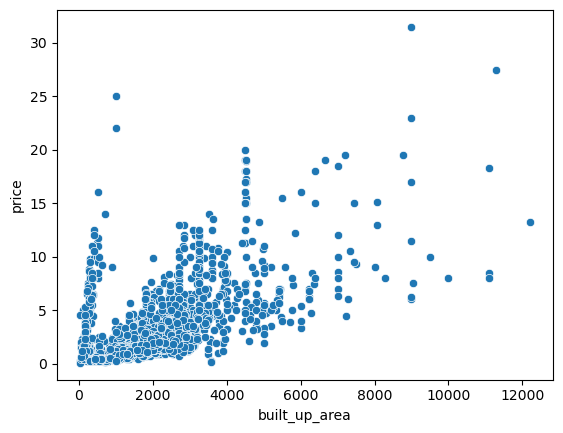

In [78]:
sns.scatterplot(x = df["built_up_area"], y = df["price"])

In [80]:
anomoly_df = df[(df["built_up_area"]<2000) & (df["price"]>2.5)][["price", "built_up_area", "area"]]

In [81]:
anomoly_df["built_up_area"] = anomoly_df["area"]

In [82]:
df.update(anomoly_df)

In [88]:
df.sample()

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score,area/room
342,flat,emaar mgf emerald floors premier,sector 65,2.79,14127.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4.0,4.0,3+,2.0,South-West,Relatively New,NaN,2194.0,1975.0,0,1,1,0,0,2,174,493.75


<Axes: xlabel='built_up_area', ylabel='price'>

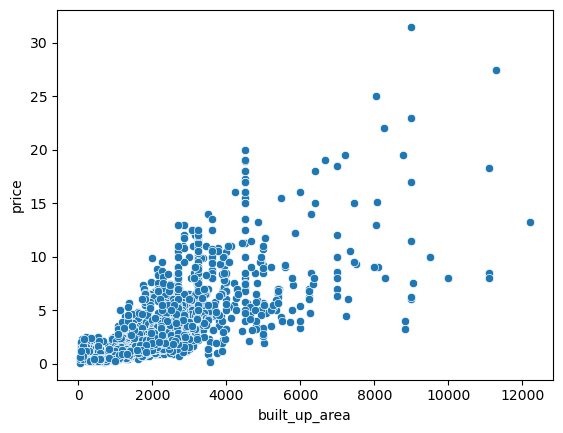

In [83]:
sns.scatterplot(x = df["built_up_area"], y = df["price"])

In [90]:
df.drop(columns = ["carpet_area", "area", "super_built_up_area", "areaWithType", "area/room"], inplace = True)

In [85]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'Price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'store room', 'study room', 'servant room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area/room'],
      dtype='object')

In [91]:
df.sample(5)

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
2411,house,independent,sector 70a,2.10,3889.0,3.0,2.0,1,3.0,NaN,New Property,667.0,0,0,0,0,0,0,0
1149,flat,uphaar residency 2,sector 105,0.42,5600.0,3.0,2.0,1,0.0,East,Moderately Old,833.0,0,0,0,0,1,0,7
3085,flat,la vida by tata housing,sector 113,2.40,10825.0,3.0,4.0,3+,5.0,North-East,Relatively New,1940.0,0,0,1,0,0,0,49
1855,flat,imperia aashiyara,sector 37c,0.40,5882.0,2.0,2.0,3,3.0,NaN,Under Construction,756.0,0,0,0,0,0,0,126
3226,flat,smart world gems,sector 89,1.10,9973.0,2.0,2.0,2,3.0,NaN,New Property,1226.0,1,0,0,0,0,0,77


In [92]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
Price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1003
agePossession         0
built_up_area         0
store room            0
study room            0
servant room          0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [ ]:
# floor_num

In [94]:
df[df["floorNum"].isnull()]

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
92,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
132,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,1,0,1,1,0,0,88
364,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
561,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,1,0,1,1,0,1,114
654,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1380,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1736,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1757,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1829,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1842,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0


In [95]:
df[df["property_type"]== "house"]["floorNum"].median()

2.0

In [96]:
df["floorNum"].fillna(2.0, inplace = True)

In [97]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
Price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1003
agePossession         0
built_up_area         0
store room            0
study room            0
servant room          0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

<Axes: ylabel='count'>

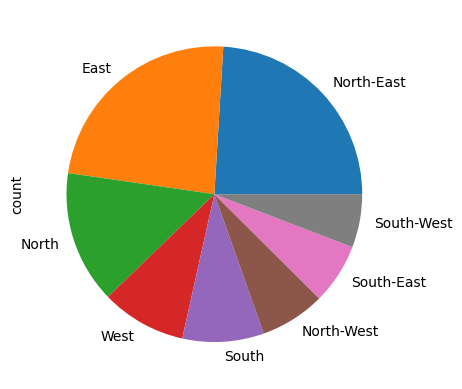

In [98]:
df["facing"].value_counts().plot(kind = "pie")

In [99]:
df.shape

(3541, 19)

In [100]:
df.drop(columns = ["facing"], inplace = True)

In [101]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
Price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [102]:
df[df["society"].isnull()]

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
2705,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [104]:
df.drop(df.index[2705], inplace = True)

In [106]:
df.shape

(3540, 18)

In [109]:
df[df["agePossession"]=="Undefined"]

,property_type,society,sector,price,Price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,store room,study room,servant room,pooja room,others,furnishing_type,luxury_score
31,flat,m3m golfestate,sector 79,1.40,10000.0,2.0,2.0,2,4.0,Undefined,1556.0,1,1,1,0,0,2,83
42,flat,m3m one key resiments,sector 67,0.80,13115.0,1.0,1.0,0,0.0,Undefined,610.0,0,0,0,0,0,0,0
47,flat,ansal housing highland park,sector 103,0.80,5878.0,2.0,2.0,2,9.0,Undefined,1361.0,0,0,0,0,0,0,0
51,house,independent,sector 8,0.62,11273.0,3.0,1.0,0,2.0,Undefined,550.0,0,0,0,0,0,0,0
54,house,shivaji nagar residential,sector 11,3.08,11407.0,6.0,4.0,2,1.0,Undefined,2700.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,flat,godrej habitat,sector 3,1.35,12784.0,2.0,2.0,0,4.0,Undefined,1056.0,0,0,0,0,0,0,60
3493,house,independent,sector 110,0.34,6800.0,1.0,1.0,0,1.0,Undefined,500.0,0,0,0,0,0,0,0
3500,house,sobha city,sector 108,10.50,14323.0,5.0,4.0,3+,1.0,Undefined,7331.0,0,0,0,0,0,0,59
3503,flat,housing apna enclave,sector 4,0.39,4105.0,2.0,2.0,1,1.0,Undefined,950.0,0,0,0,0,0,0,0


In [110]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [111]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)


In [112]:
df['agePossession'].value_counts()


agePossession
Relatively New        1714
New Property           596
Moderately Old         583
Old Property           318
Under Construction     277
Undefined               52
Name: count, dtype: int64

In [113]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [114]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)


In [115]:
df['agePossession'].value_counts()


agePossession
Relatively New        1722
New Property           597
Moderately Old         590
Old Property           321
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [116]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [117]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)


In [118]:
df['agePossession'].value_counts()


agePossession
Relatively New        1724
Moderately Old         621
New Property           597
Old Property           321
Under Construction     277
Name: count, dtype: int64

In [119]:
df.isnull().sum()



property_type      0
society            0
sector             0
price              0
Price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
store room         0
study room         0
servant room       0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [122]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)


In [121]:
df.shape

(3540, 18)